In [1]:
import numpy as np
from scipy import io as sio
from matplotlib import pyplot as plt
import inspect

In [2]:
# Define a function to see the source code of a function. 
def showfunc(functiontoshow):
    print(inspect.getsource(functiontoshow))

In [3]:
import typhon as tp

In [4]:
# Set environmental variables. 
tp.environ['ARTS_BUILD_PATH'] = '../../arts-dev/build/'
tp.environ['ARTS_INCLUDE_PATH'] = '../../arts-dev/controlfiles/'

In [5]:
# Import Typhon retrieval packages. 
import typhon.retrieval.bmci as tprb
import typhon.retrieval.mcmc as tprm
import typhon.retrieval.qrnn as tprq

Loading ARTS API from: ../../arts-dev/build/src/libarts_api.so


Using TensorFlow backend.


In [6]:
# ARTS forward model and retrieval with OEM in development version: 
tp.arts.run_arts(controlfile='./ClearSky_1D_OEM_ARTSvdev.arts');

In [7]:
# ARTS forward model results. 
Tb_ARTS_ClearSky = tp.arts.xml.load("./ClearSky_1D_OEM_Tb.xml")

# Bosung observations, 20170930
Tb_BosungObs = tp.arts.xml.load('./BosungObservations.xml')

# Frequency
f_grid = tp.arts.xml.load('./ClearSky_1D_f_grid.xml')

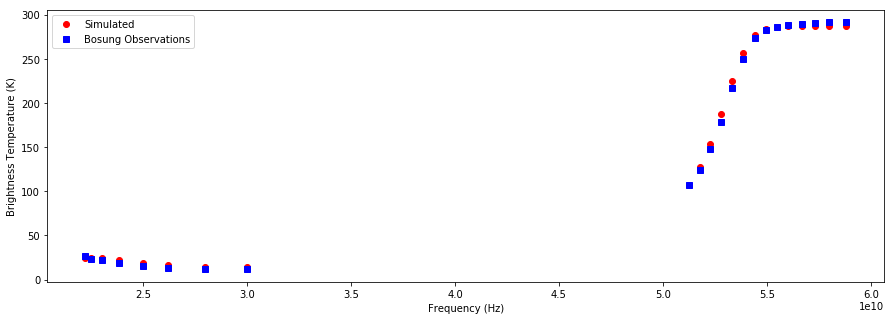

In [8]:
# Compare brightness temperatures from the simulation with the observations. 
plt.plot(f_grid, Tb_ARTS_ClearSky, 'ro', f_grid, Tb_BosungObs, 'bs')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Brightness Temperature (K)')
plt.legend(['Simulated','Bosung Observations'])
plt.gcf().set_size_inches(15,5)

In [9]:
# Retrieval results
Retrieval = tp.arts.xml.load("./ClearSky_1D_OEM_Retrieval.xml")
# Pressure grid for retrieval
p_ret_grid = tp.arts.xml.load('./ClearSky_1D_OEM_Retrieval_p_grid.xml')
nRet = p_ret_grid.shape[0]

# Water VMR from 국지예보모델
VMR_H2O_GF3 = tp.arts.xml.load('./ClearSky_1D.H2O.xml')
# Temperature from 국지예보모델
t_field_GF3 = tp.arts.xml.load('./ClearSky_1D.t.xml')

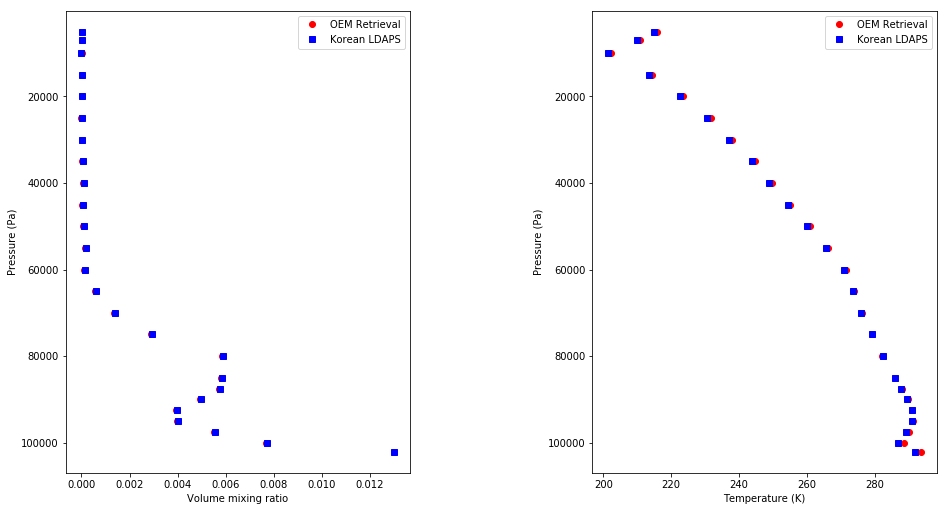

In [12]:
# Compare retrieved water VMR with the water VMR from Korean LDAPS. 
plt.figure()
plt.subplot(1,2,1)
plt.plot(Retrieval[0:nRet], p_ret_grid, 'ro', np.squeeze(VMR_H2O_GF3.data), VMR_H2O_GF3.grids[0], 'bs')
plt.gca().invert_yaxis()
plt.xlabel('Volume mixing ratio')
plt.ylabel('Pressure (Pa)')
plt.legend(['OEM Retrieval', 'Korean LDAPS'])
# plt.gcf().set_size_inches(5,10)

# Compare retrieved temperatures with the temperatures from Korea LDAPS
plt.subplot(1,2,2)
plt.plot(Retrieval[nRet:], p_ret_grid, 'ro', np.squeeze(t_field_GF3.data), VMR_H2O_GF3.grids[0], 'bs')
plt.gca().invert_yaxis()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (Pa)')
plt.legend(['OEM Retrieval', 'Korean LDAPS'])
plt.tight_layout()
plt.gcf().set_size_inches(15,8)

In [ ]:
# Create an ARTS workspace variable. 
ws = tp.arts.workspace.Workspace()

In [ ]:
%%capture
# ARTS INCLUDE files
ws.execute_controlfile("general/general.arts");
ws.execute_controlfile("general/continua.arts");
ws.execute_controlfile("general/agendas.arts");
ws.execute_controlfile("general/planet_earth.arts");

In [ ]:
# Load the jacobian calculated from the forward model. 
J = tp.arts.xml.load("./ClearSky_1D_jacobian.xml")
J.shape